In [3]:
import pandas as pd
import numpy as np
import cv2
import keras.models as M
import keras.layers as L
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import clear_output
import keras

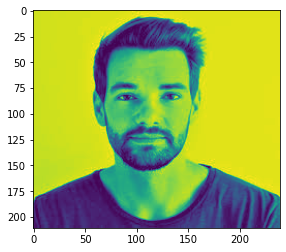

In [4]:
image=Image.open(r'C:\Users\as\Desktop\data_training\photos\images (1).jpg')
image=image.convert('L')
image=np.array(image)
plt.imshow(image)

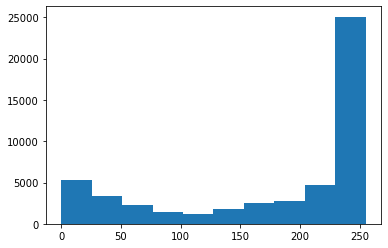

In [5]:
a,b,x=plt.hist(image.flatten())

In [6]:
def get_threshold(image) :
    a,b,x=plt.hist(image.flatten())
    arg=np.argmax(a)
    threshold=[b[arg],b[arg+1]]
    plt.clf()
    return threshold
def make_mask(path,color='blue',print_plot=False):
    image=Image.open(path)
    image=image.resize((150,150))
    image=image.convert('L')
    image=np.array(image)
    threshold=get_threshold(image)
    if color=='blue' :
        n=[0,0,255]
    masked_image=[]
    for i in image.flatten() :
        if i >= threshold[0] and i<=threshold[1] :
            masked_image.append(255)
        else:
            masked_image.append(0)
    masked_image=np.array(masked_image)
    masked_image=masked_image.reshape(image.shape)
    if print_plot==True :
        plt.imshow(masked_image)
    return masked_image

In [7]:
class1_path=r'C:\Users\as\Desktop\data_training\photos'
class2_path=r'C:\Users\as\Desktop\data_training\Signatures'

In [8]:
X=[]
y=[]
count=0
for i in os.listdir(class1_path)[:59]:
    print(count*100/59)
    clear_output(wait=True)
    count+=1
    X.append(make_mask(class1_path+'/'+i))
y=[1]*59

<Figure size 432x288 with 0 Axes>

In [9]:
x2=[]
y2=[]
count=0
for i in os.listdir(class2_path)[:60]:
    print(count*100/60)
    clear_output(wait=True)
    count+=1
    x2.append(make_mask(class2_path+'/'+i))
y2=[0]*60

<Figure size 432x288 with 0 Axes>

In [10]:
X.extend(x2)
y.extend(y2)
X=np.array(X)
y=np.array(y)
X2=X/255

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X2, y, test_size=0.15, random_state=42)

In [12]:
model=M.Sequential()
model.add(L.Reshape((150,150,1)))
model.add(L.Conv2D(kernel_size=(3,3),filters=32,input_shape=(150,150),activation='relu'))
model.add(L.MaxPool2D(pool_size=(2,2)))
model.add(L.Conv2D(kernel_size=(3,3),filters=64,activation='relu'))
model.add(L.MaxPool2D(pool_size=(2,2)))
model.add(L.Flatten())
model.add(L.Dense(1000,activation='tanh'))
model.add(L.Dense(100,'relu'))
model.add(L.Dense(2,activation='softmax'))

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
#model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

In [15]:
cv = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
4/4 [==============================] - 125s 20s/step - loss: 9.1733 - accuracy: 0.5149 - val_loss: 0.2106 - val_accuracy: 0.8889
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 1.5407 - accuracy: 0.6337 - val_loss: 0.6204 - val_accuracy: 0.5556
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 0.4125 - accuracy: 0.7822 - val_loss: 1.0116 - val_accuracy: 0.6111
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.4333 - accuracy: 0.8416 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.2632 - accuracy: 0.9505 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 0.0235 - accuracy: 0.9901 - val_loss: 0.1637 - val_accuracy: 0.9444
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 0.1482 - accuracy: 0.9406 - val_loss: 0.0447 - val_accuracy: 1.0000
Epoch 8/20
4/4 [======================

In [17]:
import pickle 


In [19]:
#keras.models.save_model(model,'mask_model.h5')
pickle.dump(cv, open('model.pkl', 'wb'))

In [5]:
def make_predictions(path) :
    l=['sign','photo']
    print('The masked image is :')
    arr=make_mask(path,print_plot=True)
    arr=np.array(arr)
    arr=arr.reshape(1,150,150)
    clas=np.argmax(model.predict(arr),axis=-1)
    print(l[clas[0]])

In [6]:
make_predictions(r'C:\Users\as\Desktop\data_testing\WhatsApp Image 2022-03-21 at 18.22.10 (1).jpeg')

The masked image is :


NameError: name 'make_mask' is not defined